# ℹ️ Introduction to data science notebooks

You can skip this section if you are already familiar with data science notebooks.

## Data science notebooks
A _data science notebook_ is a document that contains text cells (what you're reading right now) and code cells. What is unique with a notebook is that it's **interactive**: You can change or add code cells, and then **run** a cell by selecting it and then clicking the **Run** button above ( <strong>▶</strong>, or Run All ) or hitting `shift + enter`.

The result will be displayed directly in the notebook. 

Try running the cell below:

In [1]:
# Run this cell to see the result
100 * 1.75 * 16

2800.0

Modify any of the numbers and rerun the cell.

## Data science notebooks & data analysis
Notebooks are great for interactive data analysis. Let's create a pandas DataFrame using the `read_csv()` function. 

We will load the dataset "sales_data.csv" containing three months of sales data for the company. We use the `parse_dates` option to ensure that the "date" column is loaded correctly.

By using the `head()` command, we display the first five rows of data:

In [2]:
# Importing the pandas module
import pandas as pd

# Reading in the sales data
df = pd.read_csv('data/sales_data.csv', parse_dates=['date'])

# Take a look at the first datapoints
df.head()

,date,warehouse,client_type,product_line,quantity,unit_price,total,payment
0,2021-06-01,Central,Retail,Miscellaneous,8,16.85,134.83,Credit card
1,2021-06-01,North,Retail,Breaking system,9,19.29,173.61,Cash
2,2021-06-01,North,Retail,Suspension & traction,8,32.93,263.45,Credit card
3,2021-06-01,North,Wholesale,Frame & body,16,37.84,605.44,Transfer
4,2021-06-01,Central,Retail,Engine,2,60.48,120.96,Credit card


## Data analysis example:

Find the total sales for each warehouse. 

We can use `groupby` to group the information by the column "warehouse". Then we select the column "total" and use `.sum()` to add the "total" column for each warehouse:

In [3]:
df.groupby('warehouse')[['total']].sum()

,total
warehouse,
Central,141982.88
North,100203.63
West,46926.49


## Data science notebooks & visualizations
Visualizations are very helpful to summarize data and gain insights. A well-crafted chart often conveys information much better than a table.

It is very straightforward to include plots in a data science notebook. For example, let's look at the average number of items purchased by each client type. 

We are using the `matplotlib.pyplot` library for this example. We will run the `.plot()` method on the data we want to display and call `plt.show()` to draw the plot:

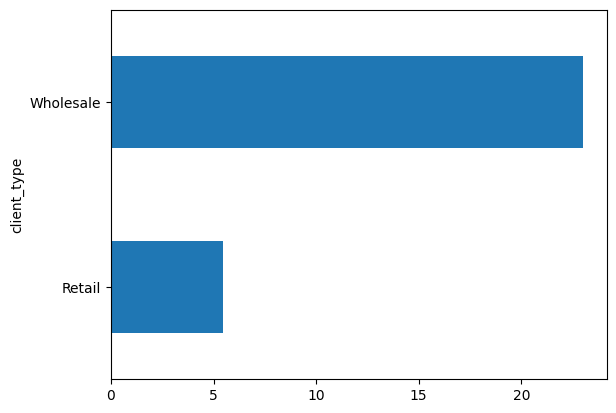

In [4]:
import matplotlib.pyplot as plt

avg_units_client_type = df.groupby('client_type')['quantity'].mean()
avg_units_client_type.plot(kind='barh')
plt.show()

# Reporting on sales data

Now let's now move on to the competition and challenge.

## 📖 Background
You work in the accounting department of a company that sells motorcycle parts. The company operates three warehouses in a large metropolitan area.

You’ve recently learned data manipulation and plotting, and suggest helping your colleague analyze past sales data. Your colleague wants to capture sales by payment method. She also needs to know the average unit price for each product line.

## 💾 The data

#### The sales data has the following fields:
- "date" - The date, from June to August 2021.
- "warehouse" - The company operates three warehouses: North, Central, and West.
- "client_type" - There are two types of customers: Retail and Wholesale.
- "product_line" - Type of products purchased.
- "quantity" - How many items were purchased.
- "unit_price" - Price per item sold.
- "total" - Total sale = quantity * unit_price.
- "payment" - How the client paid: Cash, Credit card, Transfer.

In [5]:
df.head()

,date,warehouse,client_type,product_line,quantity,unit_price,total,payment
0,2021-06-01,Central,Retail,Miscellaneous,8,16.85,134.83,Credit card
1,2021-06-01,North,Retail,Breaking system,9,19.29,173.61,Cash
2,2021-06-01,North,Retail,Suspension & traction,8,32.93,263.45,Credit card
3,2021-06-01,North,Wholesale,Frame & body,16,37.84,605.44,Transfer
4,2021-06-01,Central,Retail,Engine,2,60.48,120.96,Credit card


## 💪 Challenge
Create a report to answer your colleague's questions. Include:

1. What are the total sales for each payment method?
2. What is the average unit price for each product line?
3. Create plots to visualize findings for questions 1 and 2.
4. [Optional] Investigate further (e.g., average purchase value by client type, total purchase value by product line, etc.)
5. Summarize your findings.

## ✅ Checklist before publishing
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- Remove redundant cells like the introduction to data science notebooks, so the workbook is focused on your story.
- Check that all the cells run without error.

## ⌛️ Time is ticking. Good luck!

In [6]:
df['payment'].unique()

array(['Credit card', 'Cash', 'Transfer'], dtype=object)

In [22]:
df1 = df.groupby('payment')['total'].sum().sort_values(ascending = False).reset_index()
df1

,payment,total
0,Transfer,159642.33
1,Credit card,110271.57
2,Cash,19199.10


In [67]:
import seaborn as sns


In [24]:
df2 = df.groupby('product_line')['unit_price'].mean().sort_values(ascending = False).reset_index()
df2

,product_line,unit_price
0,Engine,60.091803
1,Frame & body,42.832229
2,Suspension & traction,33.969868
3,Electrical system,25.585130
4,Miscellaneous,22.810738
5,Breaking system,17.740522


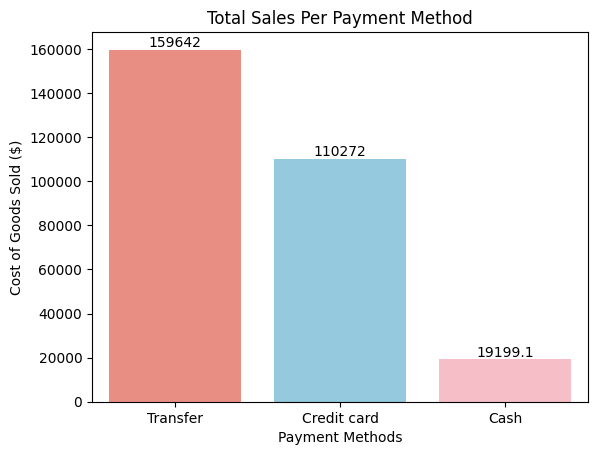

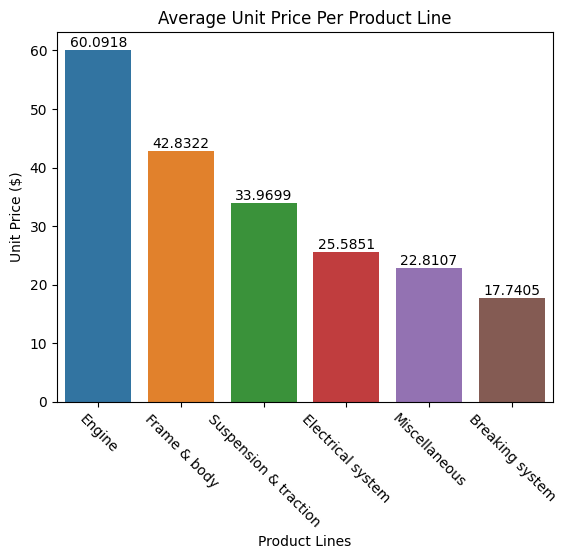

In [69]:
plt.figure()
ax = sns.barplot( x= 'payment', y = 'total' , data = df1, palette = ['salmon', 'skyblue', 'lightpink'])
plt.title("Total Sales Per Payment Method")
ax.bar_label(ax.containers[0])
plt.ylabel('Cost of Goods Sold ($)')
plt.xlabel('Payment Methods')
plt.figure()
ax = sns.barplot( x= 'product_line', y = 'unit_price' , data = df2)
plt.xticks(rotation = -45)
plt.title('Average Unit Price Per Product Line')
ax.bar_label(ax.containers[0])
plt.ylabel('Unit Price ($)')
plt.xlabel('Product Lines')

plt.show()

In [35]:
df['client_type'].unique()

array(['Retail', 'Wholesale'], dtype=object)

In [38]:
df3 = df.groupby('client_type')['total'].mean().sort_values(ascending = False).reset_index()
df3

,client_type,total
0,Wholesale,709.521467
1,Retail,167.058929


In [46]:
df4 = df.groupby('product_line')['total'].mean().sort_values(ascending = False).reset_index()
df4

,product_line,total
0,Engine,622.055410
1,Frame & body,415.811627
2,Suspension & traction,320.237763
3,Electrical system,225.972591
4,Miscellaneous,222.670656
5,Breaking system,166.739783


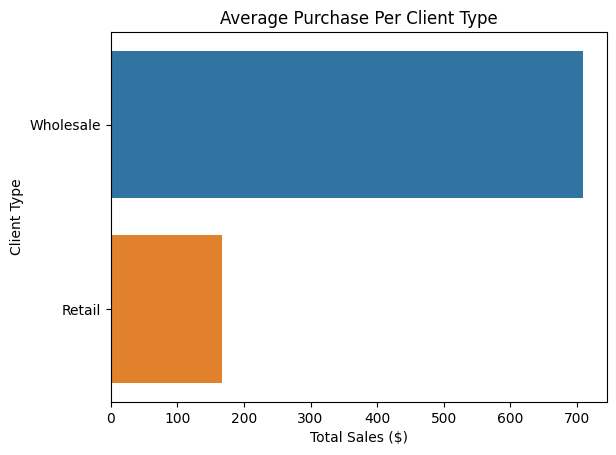

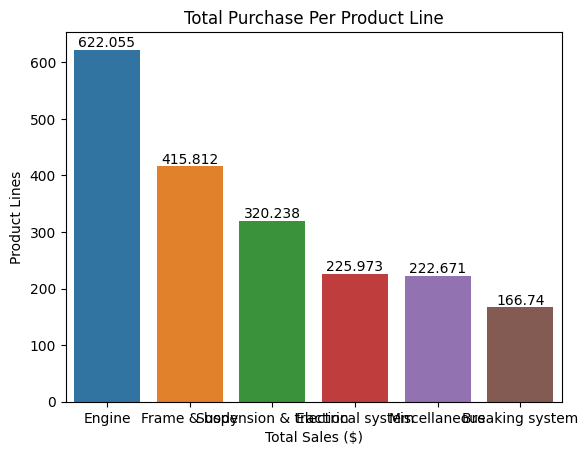

In [75]:
plt.figure()
ax = sns.barplot( y= 'client_type', x = 'total' , data = df3)
#plt.xticks(rotation = -45)
plt.title('Average Purchase Per Client Type')
#ax.bar_label(ax.containers[0])
plt.xlabel('Total Sales ($)')
plt.ylabel('Client Type')
plt.figure()
ax = sns.barplot( x= 'product_line', y = 'total' , data = df4)
#plt.xticks(rotation = -45)
plt.title('Total Purchase Per Product Line')
ax.bar_label(ax.containers[0])
plt.xlabel('Total Sales ($)')
plt.ylabel('Product Lines')
plt.show()